<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [2]:
import os, cv2, glob, time
import numpy as np

import matplotlib.pyplot as plt

# Set Constants

In [8]:
# Constants
WIDTH, HEIGHT = 128, 128

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '2',
    'date' : '02-16-2021',
    'description' : 'Save Low dimensional data\n'
    }

ROOT_DIR = os.getcwd()
os.chdir(ROOT_DIR)

GEOLIFE_DIR = os.path.join('C:\\', 'Dataset', 'Geolife')
DATA_DIR = os.path.join(GEOLIFE_DIR, 'Data')
IMAGE_DIR = os.path.join(GEOLIFE_DIR, 'Image_Files')

if ( 'Results' not in os.listdir() ):
    os.mkdir( 'Results' )
RESULT_DIR = os.path.join( 'C:\\', 'GitHub', 'Lab_Experiment', 'Results')

plt.gray()

<Figure size 432x288 with 0 Axes>

# Load and Preprocessing Data

In [4]:
os.chdir(IMAGE_DIR)
file_names = sorted(glob.glob('*png'))

In [5]:
train_images = []
for file in file_names:
    src = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    dst = cv2.resize(src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    train_images.append(dst)

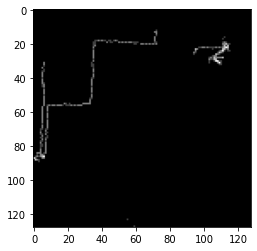

(128, 128)


In [6]:
plt.imshow(train_images[0])
plt.show()
print(train_images[0].shape)

In [9]:
X_train = np.array( train_images ).astype( 'float32' ) / 255.
X_train = np.reshape( X_train, ( -1, HEIGHT, WIDTH, 1 ) )

In [10]:
print( X_train.shape )

(18670, 128, 128, 1)


# Test Model

In [11]:
import tensorflow as tf
from tensorflow import keras

In [15]:
os.chdir(RESULT_DIR)
os.chdir('Trajectory_Clusetring(Vessel_Method)_02-16-2022_Data/')

encoder = keras.models.load_model('encoder.h5')
auto_encoder = keras.models.load_model('auto_encoder.h5')

os.chdir(RESULT_DIR)

new_result_dir = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Data"
os.mkdir( new_result_dir )
os.chdir( new_result_dir )

with open( 'Description.txt', 'w' ) as f:
    f.write( EXPERIMENT_DATA['description'] )

In [18]:
low_dimension_data, prevIdx = [ ], 0
for i in range(0, len(X_train), 1000):
    low_dimension_data.extend(encoder(X_train[prevIdx:i]))
    prevIdx = i
low_dimension_data.extend(encoder(X_train[prevIdx:]))

low_dimension_data = np.array(low_dimension_data)
print(X_train.shape)
print(low_dimension_data.shape)

ResourceExhaustedError: OOM when allocating tensor with shape[1000,32,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D]

## Save low dimensional value

In [17]:
import pickle as pkl

os.chdir(GEOLIFE_DIR)
if ('Low_Dimension_Vessel' not in os.listdir()):
    os.mkdir('Low_Dimension_Vessel')
os.chdir('Low_Dimension_Vessel')

for i in range(0, len(low_dimension_data)):
    with open(f'{i}th data', 'wb') as f:
        pkl.dump(low_dimension_data[i], f)